# Project Title: Heart Disease Predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")        #Importing the necessary libraries

C:\Users\Prabhakar\AppData\Local\Temp\ipykernel_9344\3026477554.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### DATA COLLECTION

In [2]:
df=pd.read_csv("Heart_Disease.csv")      #Fetching the dataset

In [3]:
df.head()                               #Viewing the first 5 rows of the dataset

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,male,39,4,no,0,0,0,0,no,195,106.0,70.0,26.97,80,77,no
1,female,46,2,no,0,0,0,0,no,250,121.0,81.0,28.73,95,76,no
2,male,48,1,yes,20,0,0,0,no,245,127.5,80.0,25.34,75,70,no
3,female,61,3,yes,30,0,0,1,no,225,150.0,95.0,28.58,65,103,yes
4,female,46,3,yes,23,0,0,0,no,285,130.0,84.0,23.10,85,85,no


## Information about the dataset

sex: This column represents the gender of the individuals (female- male).

age: This column represents the age of the individuals in the dataset. Age is a crucial factor in assessing the risk of coronary heart disease.

education: This column represents the level of education of the individuals. It could be coded using categorical values indicating different levels of education attainment.

smokingStatus: This column likely represents the smoking status of the individuals, indicating whether they are smokers(yes), non-smokers(no).

cigsPerDay: If an individual is a smoker, this column represents the number of cigarettes smoked per day.

BPMeds: This column indicates whether the individual is taking blood pressure medications (binary: 0 for not taking, 1 for taking).

prevalentStroke: This column indicates whether an individual has had a stroke prior to the study (binary: 0 for no,

prevalentHyp: This column indicates whether an individual has hypertension (binary: 0 for no, 1 for yes).

diabetes: This column indicates whether an individual has diabetes (binary: 0 for no, 1 for yes).

totChol: This column represents the total cholesterol level of the individuals.

sysBP: This column represents the systolic blood pressure of the individuals.

diaBP: This column represents the diastolic blood pressure of the individuals.

BMI: This column represents the Body Mass Index (BMI) of the individuals, which is a measure of body fat based on height and weight.

heartRate: This column represents the resting heart rate of the individuals.

glucose: This column represents the fasting blood glucose level of th

CHDRisk: This column likely represents the Ten-Year Coronary Heart Disease (CHD) Risk for each individual, which is the target variable that you may want to predict or analyze.e individuals. 1 for yes).

In [4]:
df.columns   #These are the names of columns present in the dataset

Index(['sex', 'age', 'education', 'smokingStatus', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'CHDRisk'],
      dtype='object')

In [5]:
df.shape[0]      #These are the number of rows in the dataset

3674

In [6]:
df.shape[1]        #these are the number of columns in the dataset

16

##### There are 15 columns of input features and 1 column of target that is "CHDRisk"

### DATA CLEANING

In [7]:
df.info()        # Checking the dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3674 entries, 0 to 3673
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3663 non-null   object 
 1   age              3674 non-null   int64  
 2   education        3674 non-null   int64  
 3   smokingStatus    3661 non-null   object 
 4   cigsPerDay       3674 non-null   int64  
 5   BPMeds           3674 non-null   int64  
 6   prevalentStroke  3674 non-null   int64  
 7   prevalentHyp     3674 non-null   int64  
 8   diabetes         3674 non-null   object 
 9   totChol          3674 non-null   int64  
 10  sysBP            3674 non-null   float64
 11  diaBP            3674 non-null   float64
 12  BMI              3674 non-null   float64
 13  heartRate        3674 non-null   int64  
 14  glucose          3674 non-null   int64  
 15  CHDRisk          3674 non-null   object 
dtypes: float64(3), int64(9), object(4)
memory usage: 459.4+ KB


#### Here we can see that there are some null values.

In [8]:
df.isna().sum()         #checking total sum of null values

sex                11
age                 0
education           0
smokingStatus      13
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
CHDRisk             0
dtype: int64

##### here we can see that there are 11 null values in sex column and 13 null values in smoking status column, the number of null values is not large hence we can drop the null values

In [9]:
df.duplicated().sum()        #checking the sum of duplicated values

15

##### Here we can see that there are total 15 duplicated values, so we have to drop the duplicated values

In [10]:
df.dropna(inplace=True)        #dropping the null values

In [11]:
df.drop_duplicates(inplace=True)     #dropping the duplicated values

In [12]:
df.info()              # we can see that the rows have been reduced because we have dropped the duplicated values

<class 'pandas.core.frame.DataFrame'>
Index: 3637 entries, 0 to 3673
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3637 non-null   object 
 1   age              3637 non-null   int64  
 2   education        3637 non-null   int64  
 3   smokingStatus    3637 non-null   object 
 4   cigsPerDay       3637 non-null   int64  
 5   BPMeds           3637 non-null   int64  
 6   prevalentStroke  3637 non-null   int64  
 7   prevalentHyp     3637 non-null   int64  
 8   diabetes         3637 non-null   object 
 9   totChol          3637 non-null   int64  
 10  sysBP            3637 non-null   float64
 11  diaBP            3637 non-null   float64
 12  BMI              3637 non-null   float64
 13  heartRate        3637 non-null   int64  
 14  glucose          3637 non-null   int64  
 15  CHDRisk          3637 non-null   object 
dtypes: float64(3), int64(9), object(4)
memory usage: 483.0+ KB


In [13]:
df.reset_index()          #as the rows have been decreased, we have to reset the index values.

,index,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,0,male,39,4,no,0,0,0,0,no,195,106.0,70.0,26.97,80,77,no
1,1,female,46,2,no,0,0,0,0,no,250,121.0,81.0,28.73,95,76,no
2,2,male,48,1,yes,20,0,0,0,no,245,127.5,80.0,25.34,75,70,no
3,3,female,61,3,yes,30,0,0,1,no,225,150.0,95.0,28.58,65,103,yes
4,4,female,46,3,yes,23,0,0,0,no,285,130.0,84.0,23.10,85,85,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3648,male,58,1,no,0,0,0,0,no,233,125.5,84.0,26.05,67,76,yes
3633,3651,male,58,3,no,0,0,0,1,no,187,141.0,81.0,24.96,80,81,no
3634,3653,male,50,1,yes,1,0,0,1,no,313,179.0,92.0,25.97,66,86,yes
3635,3655,female,52,2,no,0,0,0,0,no,269,133.5,83.0,21.47,80,107,no


## DATA EXPLORATION & VISUALIZATION

In [14]:
df.describe().T         #Checking the statistical data of the dataset

,count,mean,std,min,25%,50%,75%,max
age,3637.0,49.549629,8.559992,32.00,42.00,49.00,56.00,70.0
education,3637.0,1.978554,1.022078,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3637.0,9.027770,11.913031,0.00,0.00,0.00,20.00,70.0
BPMeds,3637.0,0.030245,0.171283,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3637.0,0.005774,0.075777,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3637.0,0.312070,0.463402,0.00,0.00,0.00,1.00,1.0
totChol,3637.0,236.879846,44.130297,113.00,206.00,234.00,263.00,600.0
sysBP,3637.0,132.359087,22.079468,83.50,117.00,128.00,144.00,295.0
diaBP,3637.0,82.902805,11.956057,48.00,75.00,82.00,90.00,142.5
BMI,3637.0,25.786607,4.059526,15.54,23.08,25.38,28.04,56.8


#### As per the statistical analysis, there is skewedness and outliers present in the continuous features such as totChol,sysBP,cigsPerDay,diaBP,BMI,heartRate,glucose.

In [15]:
def check_value_counts(df):
    for column in df.columns:
        print(df[column].value_counts())              #created a function to check the value counts of each column

In [16]:
check_value_counts(df)

sex
female    2026
male      1611
Name: count, dtype: int64
age
40    166
46    165
42    159
48    149
39    146
41    145
44    143
45    140
43    136
52    128
55    123
38    123
50    122
51    121
54    119
49    115
53    115
47    113
57    108
56    103
59    100
60     98
58     97
63     95
62     91
61     90
64     80
37     79
36     77
65     45
67     38
66     34
35     33
68     15
34     14
33      5
69      5
32      1
70      1
Name: count, dtype: int64
education
1    1519
2    1097
3     601
4     420
Name: count, dtype: int64
smokingStatus
no     1857
yes    1780
Name: count, dtype: int64
cigsPerDay
0     1857
20     648
30     191
15     183
10     122
9       99
5       98
3       82
40      68
1       61
43      48
25      45
35      19
6       17
2       16
7       11
8        9
60       9
4        8
17       7
18       7
11       5
23       5
50       4
13       3
45       3
12       3
16       3
19       2
38       1
29       1
70       1
14       1
Name: 

#### Here we can see all the value counts of each column and also there is a huge difference in class of target column that is there are 3084 people who does not have coronary heart disease risk and 553 people who have coronary heart disease risk.

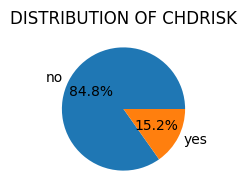

In [17]:
plt.figure(figsize=(4,2))
plt.pie(df["CHDRisk"].value_counts(), labels=df["CHDRisk"].value_counts().index, autopct="%1.1f%%")
plt.title("DISTRIBUTION OF CHDRISK")
plt.show()

##### The pie chart distribution shows that 84.8% of the total population does not have Coronary heart disease(CHD) whereas 15.2% are affected with CHD.

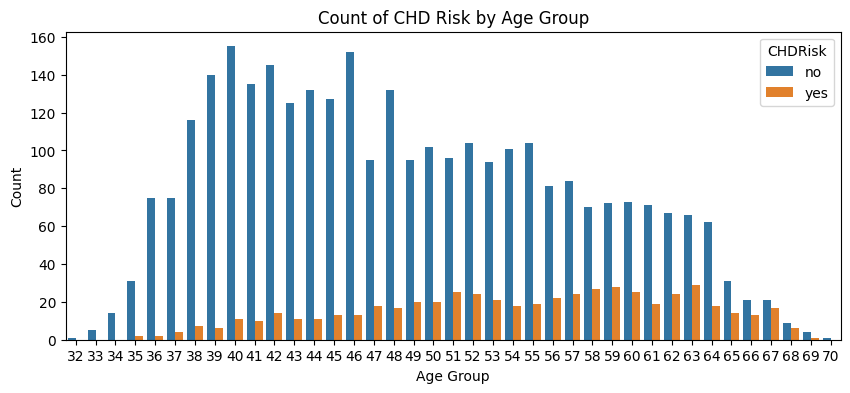

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(x="age", hue="CHDRisk", data=df)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of CHD Risk by Age Group')
plt.legend(title='CHDRisk')
plt.show()

#### This graph shows the range of age group affected and not affected by CHD.
##### mostly the age group 50-65 are affected.

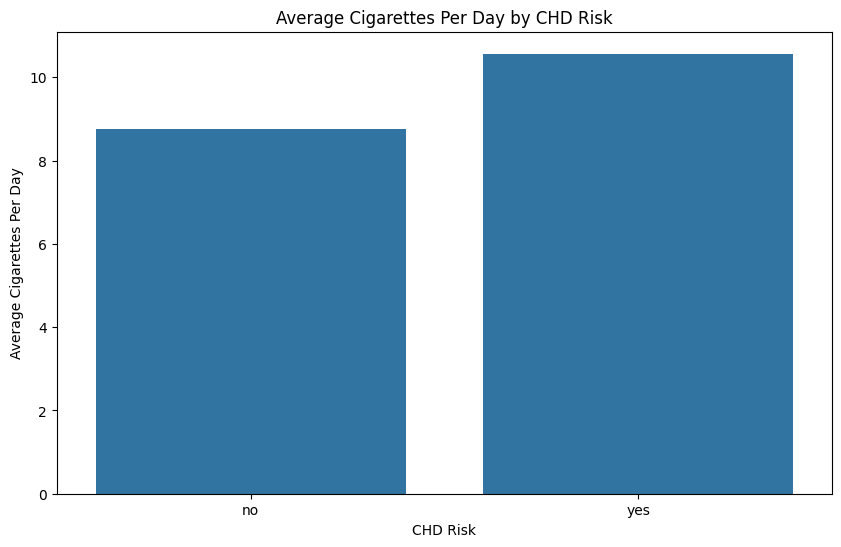

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CHDRisk', y='cigsPerDay', data=df, ci=None)
plt.xlabel('CHD Risk')
plt.ylabel('Average Cigarettes Per Day')
plt.title('Average Cigarettes Per Day by CHD Risk')
plt.show()

#### From the above visualisation we can say that there is no specific relation between cigarettes consumed by a person in a single day with the CHD risk, because the people who consume 1 to 8 cigarette per day can be affected or not affected, both the possibities are true, but it is definately true that consuming more number of cigarette can lead to risk of CHD.

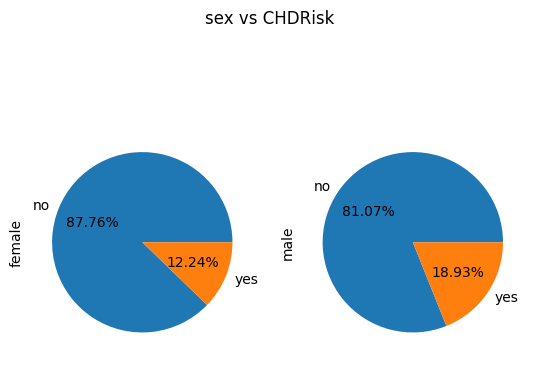

In [20]:
pd.crosstab(df["CHDRisk"],df["sex"]).plot.pie(title = "sex vs CHDRisk",subplots = True,legend = False,autopct = "%.2f%%")
plt.show() 

#### In this pie chart we can visualize that 87.76 females from the population are not affected by CHD, only 12.24% are affected. In case of males we have 81.07% affected and 18.93% not affected.

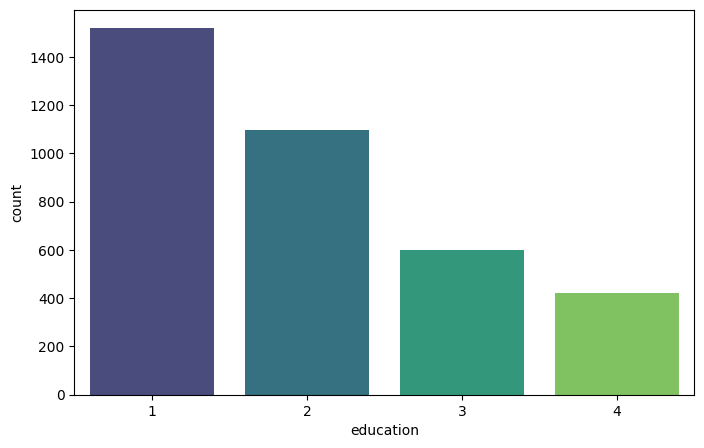

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["education"], data=df, palette='viridis')
plt.xlabel("education")
plt.show()

#### Here in the 'education' column majority of the count falls under category 1, with fewer falling under category 4.

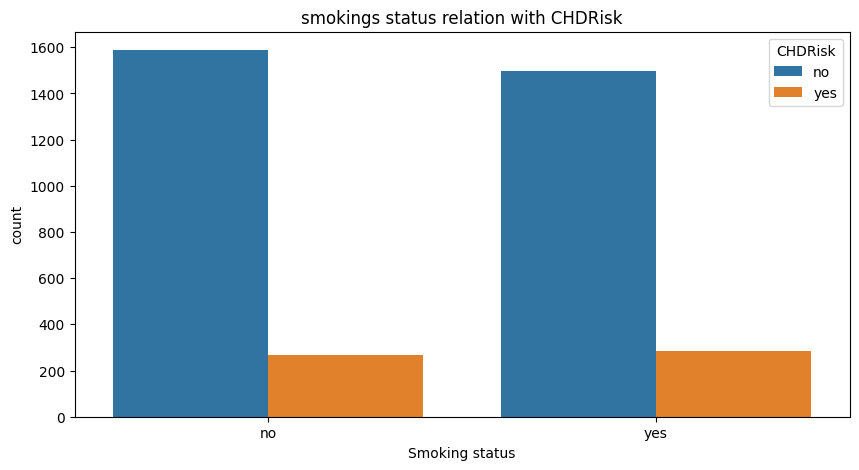

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["smokingStatus"],hue=df["CHDRisk"])
plt.title("smokings status relation with CHDRisk")
plt.xlabel("Smoking status")
plt.show()

#### This graph depicts that the count of non smoker is more than that of smoker but there is no significant difference in the status of affected by CHD.

In [23]:
df[(df.smokingStatus == 'YES') & (df.cigsPerDay == 0)]       # checking data, weather the provide information is correct or not.

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk


#### Since the smokingStatus and cigsPerDay columns do not contain any conflict cases. It is sufficient to provide information regarding smokingStatus in the cigsPerDay column.
#### Droping smokingStatus column due to multi-collinearity

In [24]:
df.drop('smokingStatus', axis=1, inplace=True)

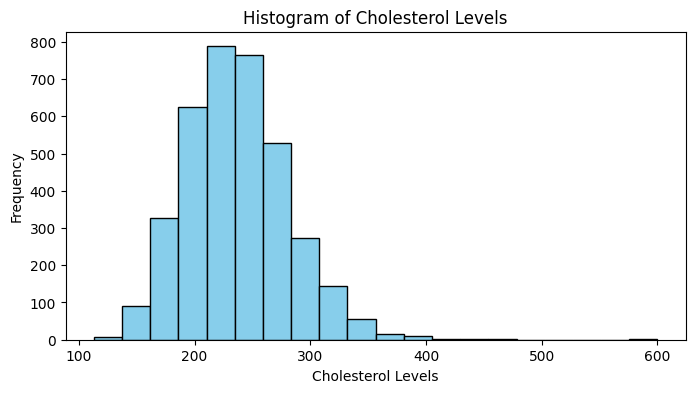

In [25]:
plt.figure(figsize=(8,4))
plt.hist(df["totChol"], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Frequency')
plt.title('Histogram of Cholesterol Levels')
plt.show()

#### This graph depicts the range of the cholesterol level and it can be seen that the max cholesterol range is between 200-300. The optimal range of total cholesterol of a normal person is less than 200mg/dl. 

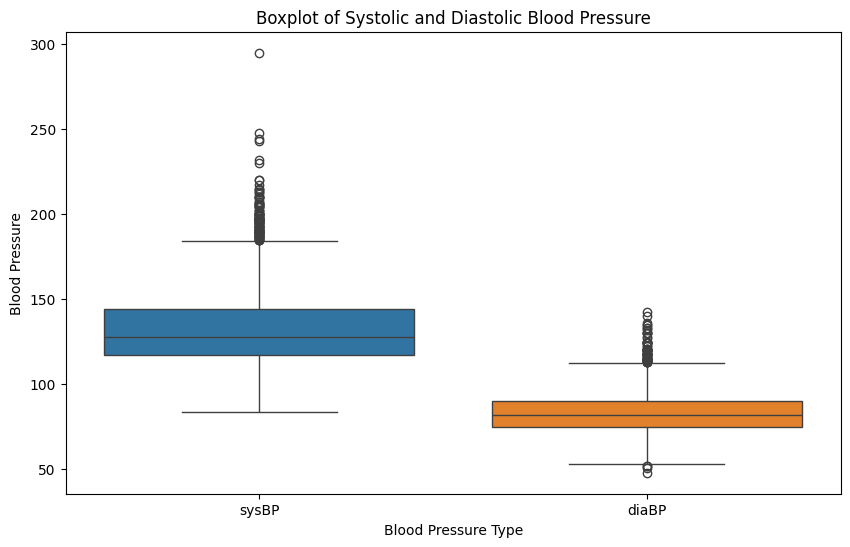

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=[df["sysBP"], df["diaBP"]])
plt.xlabel('Blood Pressure Type')
plt.ylabel('Blood Pressure')
plt.title('Boxplot of Systolic and Diastolic Blood Pressure')
plt.show()

#### In this graph we can see that sysbp and diabp has lots of outliers and also the box plot is skewed. The sysbp should be 120 and the diabp should be 80 for a normal person.

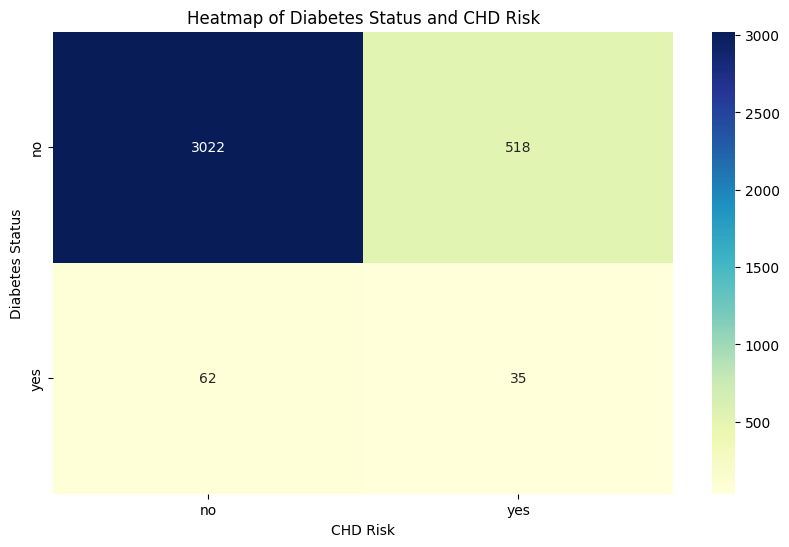

In [27]:
heatmap_data = pd.pivot_table(df, index='diabetes', columns='CHDRisk', aggfunc='size')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
plt.xlabel('CHD Risk')
plt.ylabel('Diabetes Status')
plt.title('Heatmap of Diabetes Status and CHD Risk')
plt.show()

#### there are 62 people who have diabetes but are not proned to CHD, and 518 people who does not have diabetes but are proned to CHD.

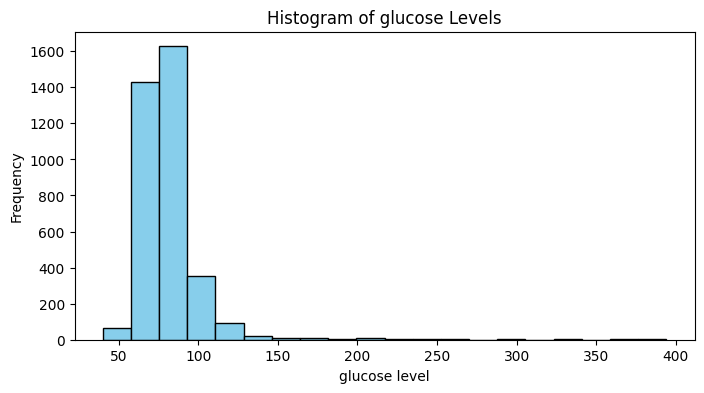

In [28]:
plt.figure(figsize=(8,4))
plt.hist(df["glucose"], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('glucose level')
plt.ylabel('Frequency')
plt.title('Histogram of glucose Levels')
plt.show()

#### here we can see the continuous distribution of glucose level which majorly falls between 60-90 and the optimal range of glucose(fasting) is 70-99mg/dl. 

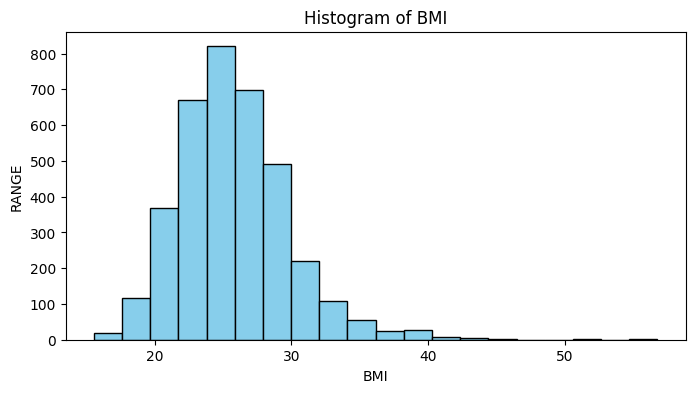

In [29]:
plt.figure(figsize=(8,4))
plt.hist(df["BMI"], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('RANGE')
plt.title('Histogram of BMI')
plt.show()

#### the maximum range of BMI falls between 22-28, which comes in the category of healthy and overweight.
#### below 18.5 is underweight
#### 18.5-24.9 is healthy
#### 25-29.9 is overweight
#### above 30 is obesity

In [30]:
pd.crosstab(df["prevalentStroke"],df["CHDRisk"])

CHDRisk,no,yes
prevalentStroke,,
0,3071,545
1,13,8


#### there are 545 person who earlier didn't had stroke but are proned to CHD, and there are less number of people(8) who earlier had stroke but are affected by CHD.

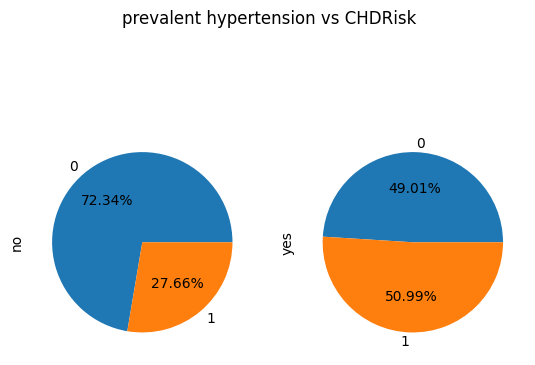

In [31]:
pd.crosstab(df["prevalentHyp"],df["CHDRisk"]).plot.pie(title = "prevalent hypertension vs CHDRisk",subplots = True,legend = False,autopct = "%.2f%%")
plt.show()

#### 72.34% of population does not have prevalent hypertension------No CHD
#### 27.66% of population had prevalent hypertension---------No CHD
#### 49.01% of the population had no prevalent hypertension------- Yes CHD
#### 50.01% of the population had prevalent hypertension-------- Yes CHD

In [32]:
df["totChol"].mean()

236.87984602694527

##### optimal range: less than 200mg/dl

In [33]:
df["sysBP"].mean()

132.35908715974705

##### optimal range: 120

In [34]:
df["diaBP"].mean()

82.90280450921088

##### optimal range: 80

In [35]:
df["heartRate"].mean()

75.7492438823206

##### optimal range: 60-100 beats/min

In [36]:
df["glucose"].mean()

81.80890844102282

##### optimal range: 70-99 mg/dl

## DATA TRANSFORMATION

In [37]:
from sklearn.preprocessing import LabelEncoder      #converting the categorical data into numerical data using LabelEncoder.

In [38]:
def encoder(df):
    encoder=LabelEncoder()
    for column in df.columns:
        if df[column].dtype=='object':
            df[column]=encoder.fit_transform(df[column])
    print('Encoding process completed')
encoder(df)

Encoding process completed


In [39]:
df.info()                   #checking if all the categorical data are transformed to numerical data.

<class 'pandas.core.frame.DataFrame'>
Index: 3637 entries, 0 to 3673
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3637 non-null   int32  
 1   age              3637 non-null   int64  
 2   education        3637 non-null   int64  
 3   cigsPerDay       3637 non-null   int64  
 4   BPMeds           3637 non-null   int64  
 5   prevalentStroke  3637 non-null   int64  
 6   prevalentHyp     3637 non-null   int64  
 7   diabetes         3637 non-null   int32  
 8   totChol          3637 non-null   int64  
 9   sysBP            3637 non-null   float64
 10  diaBP            3637 non-null   float64
 11  BMI              3637 non-null   float64
 12  heartRate        3637 non-null   int64  
 13  glucose          3637 non-null   int64  
 14  CHDRisk          3637 non-null   int32  
dtypes: float64(3), int32(3), int64(9)
memory usage: 412.0 KB


In [40]:
from sklearn.utils import resample        #since the values of classes of target column differs a lot in range, hence we have to do oversampling.

In [41]:
disease_free=df[df["CHDRisk"]==0]

In [42]:
disease=df[df["CHDRisk"]==1]

In [43]:
sampling=resample(disease,n_samples=len(disease_free))    #sampling completed

In [44]:
df=pd.concat([disease_free,sampling],axis=0)

In [45]:
df.head()                

,sex,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,1,39,4,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
4,0,46,3,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0
5,0,43,2,0,0,0,1,0,228,180.0,110.0,30.30,77,99,0


In [46]:
df.tail()

,sex,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
2479,1,49,2,17,0,0,0,0,211,128.0,89.0,31.07,75,76,1
1202,1,51,4,10,0,0,0,0,185,125.0,85.0,29.43,56,72,1
898,1,45,4,3,0,0,1,0,218,145.0,90.0,26.65,76,70,1
241,0,54,1,0,0,0,1,0,273,139.0,98.0,29.06,110,73,1
2565,0,57,1,0,1,0,1,0,432,153.0,85.0,26.13,98,75,1


In [47]:
df.info()           # the number of data has been increased to 6168 from 3674 due to oversampling

<class 'pandas.core.frame.DataFrame'>
Index: 6168 entries, 0 to 2565
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              6168 non-null   int32  
 1   age              6168 non-null   int64  
 2   education        6168 non-null   int64  
 3   cigsPerDay       6168 non-null   int64  
 4   BPMeds           6168 non-null   int64  
 5   prevalentStroke  6168 non-null   int64  
 6   prevalentHyp     6168 non-null   int64  
 7   diabetes         6168 non-null   int32  
 8   totChol          6168 non-null   int64  
 9   sysBP            6168 non-null   float64
 10  diaBP            6168 non-null   float64
 11  BMI              6168 non-null   float64
 12  heartRate        6168 non-null   int64  
 13  glucose          6168 non-null   int64  
 14  CHDRisk          6168 non-null   int32  
dtypes: float64(3), int32(3), int64(9)
memory usage: 698.7 KB


In [48]:
df.reset_index()     #since the data has been increased we have to reset the index

,index,sex,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,0,1,39,4,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,1,0,46,2,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,2,1,48,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,4,0,46,3,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0
4,5,0,43,2,0,0,0,1,0,228,180.0,110.0,30.30,77,99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6163,2479,1,49,2,17,0,0,0,0,211,128.0,89.0,31.07,75,76,1
6164,1202,1,51,4,10,0,0,0,0,185,125.0,85.0,29.43,56,72,1
6165,898,1,45,4,3,0,0,1,0,218,145.0,90.0,26.65,76,70,1
6166,241,0,54,1,0,0,0,1,0,273,139.0,98.0,29.06,110,73,1


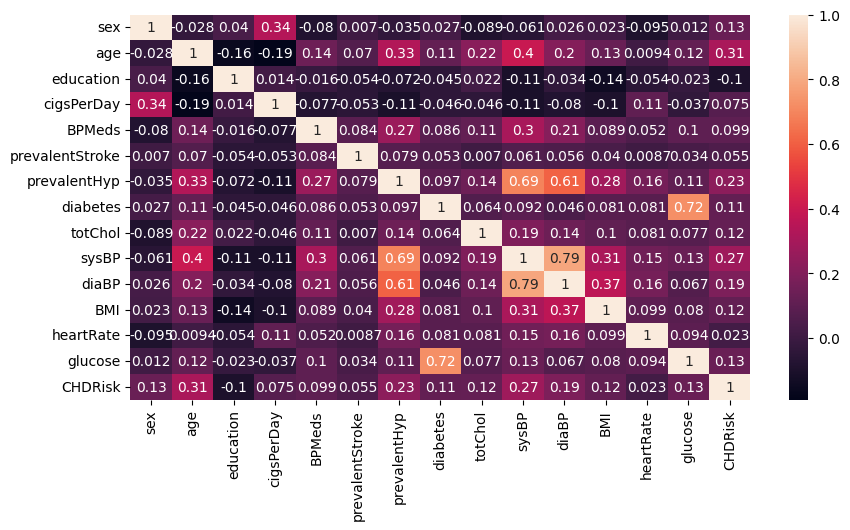

In [49]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Within the independent variables, there is no high multicollinearity

In [50]:
num_cols = [i for i in df.columns if df[i].dtype != "O"]      #categorizing the numerical columns together

In [51]:
num_cols

['sex',
 'age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'CHDRisk']

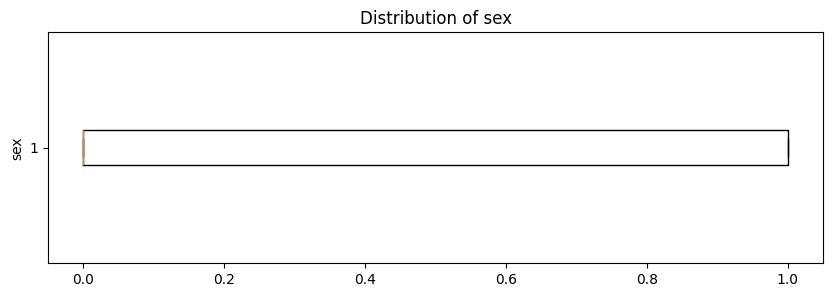

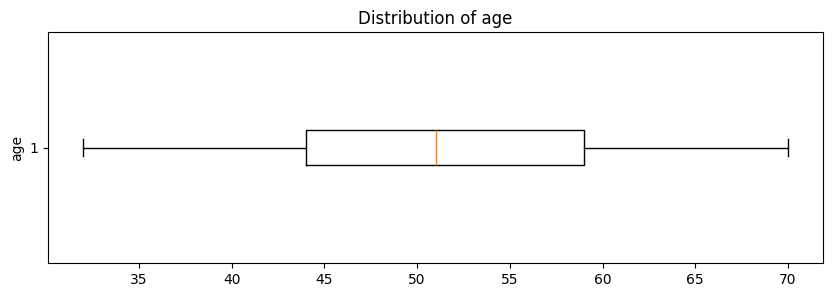

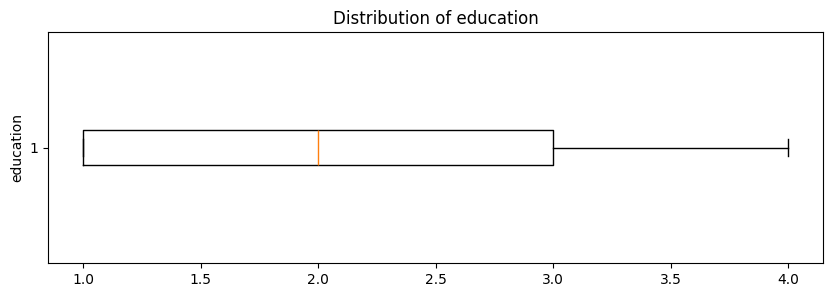

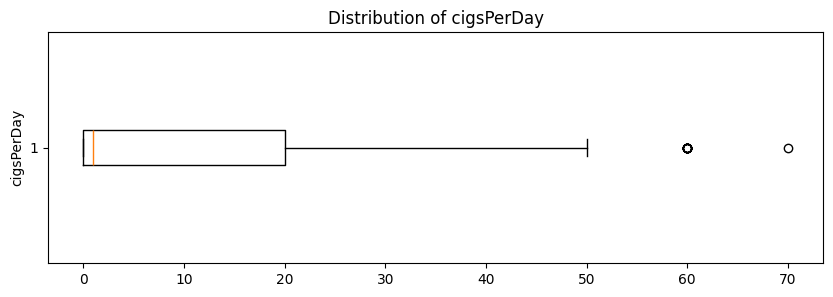

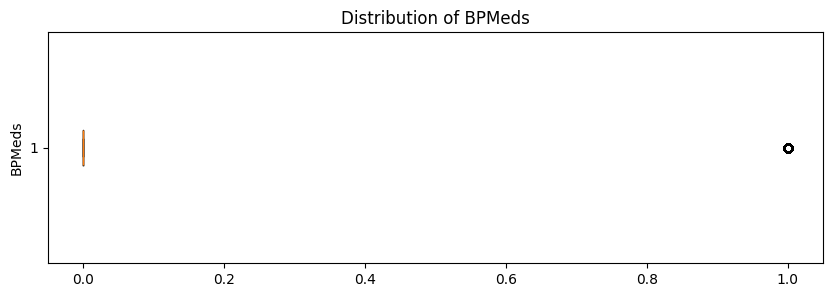

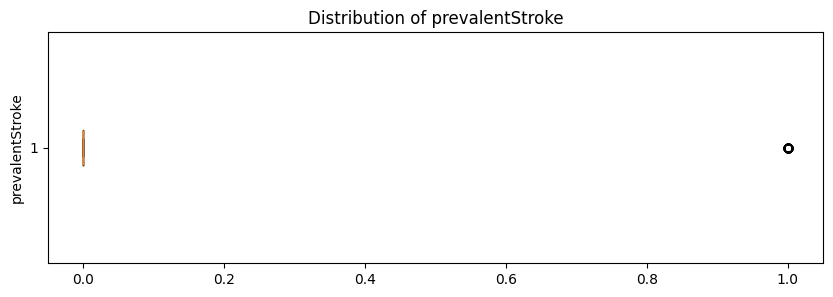

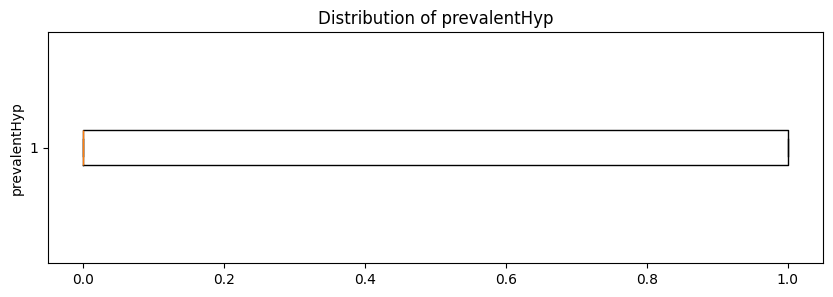

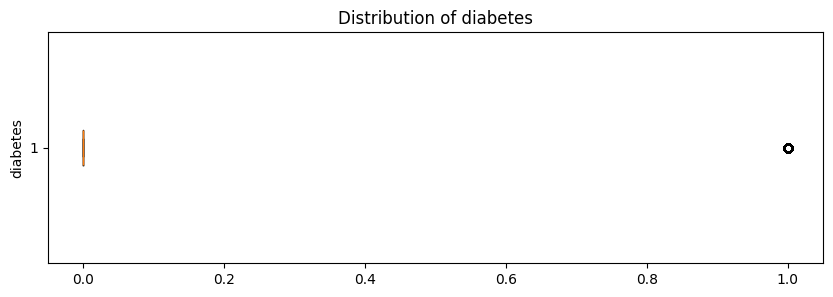

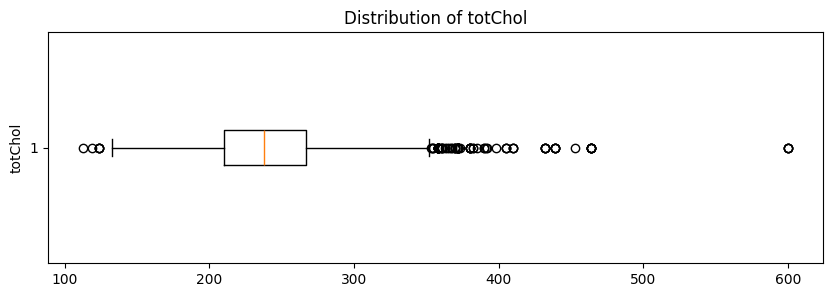

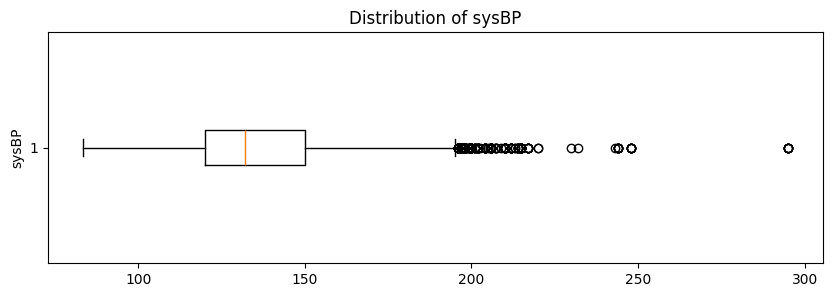

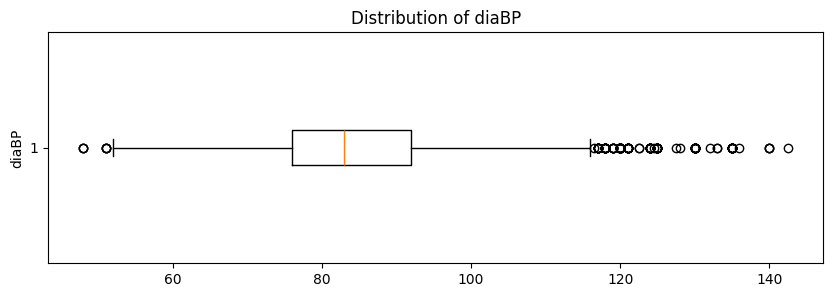

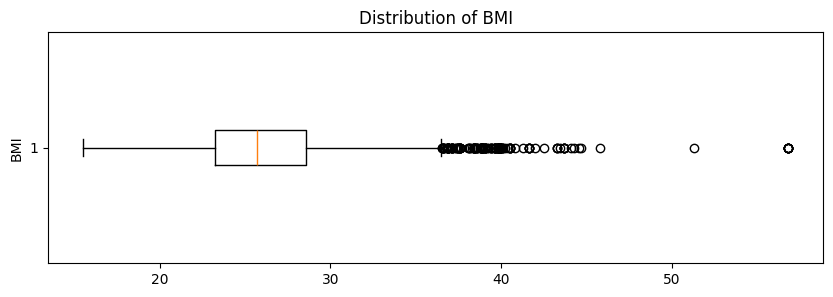

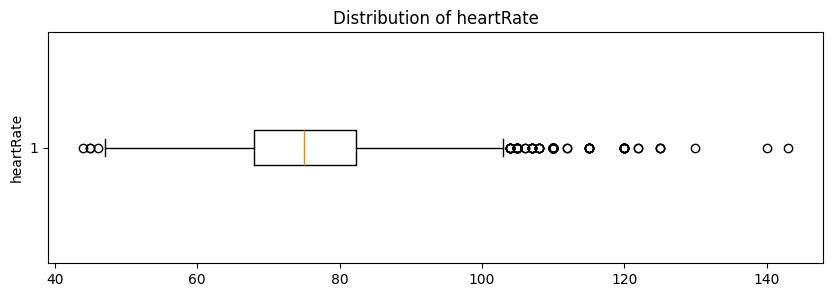

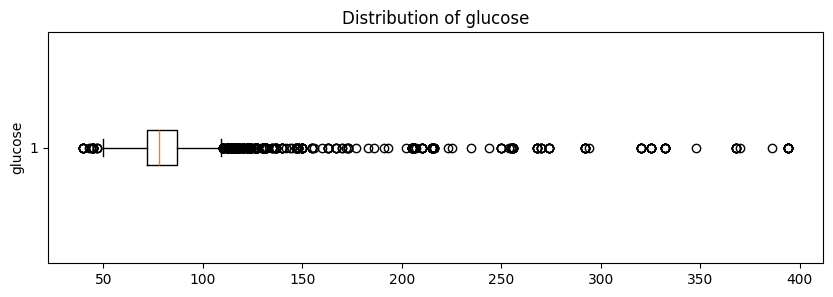

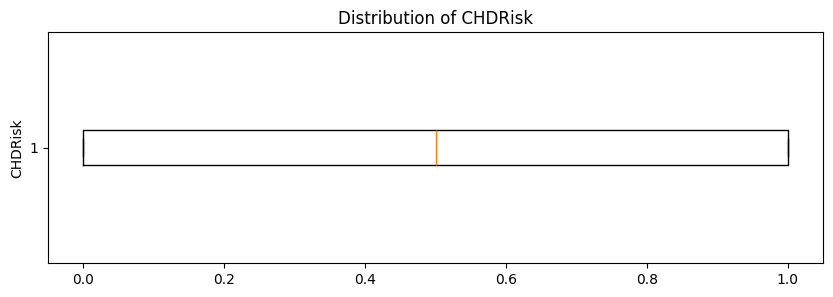

In [52]:
for i in num_cols:
    plt.figure(figsize=(10, 3))
    plt.boxplot(df[i], vert=False)
    plt.ylabel(i)                                            #visualizing all the outliers of the numerical columns
    plt.title("Distribution of {}".format(i))
    plt.show()

In [53]:
df["totChol"].quantile(0.985)         

352.0

In [54]:
df=df[df["totChol"]<=df["totChol"].quantile(0.985)]         #removing the outliers of total cholesterol column

<Axes: >

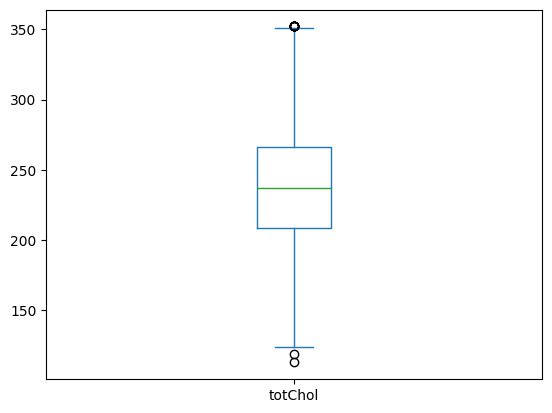

In [55]:
df["totChol"].plot.box()

In [56]:
df["sysBP"].quantile(0.95)               

184.875

In [57]:
df=df[df["sysBP"]<=df["sysBP"].quantile(0.95)]     #removing the outliers of systolic bp column

<Axes: >

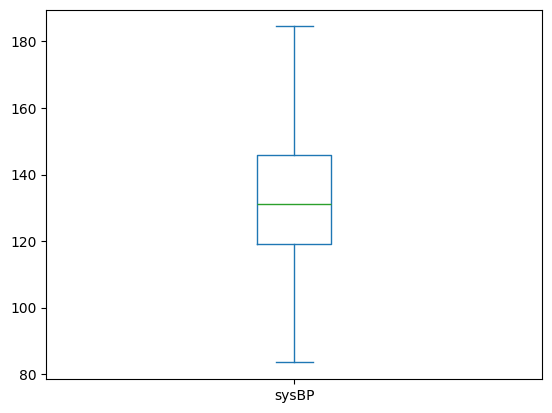

In [58]:
df["sysBP"].plot.box()

In [59]:
df["diaBP"].quantile(0.99)

115.0

In [60]:
df=df[df["diaBP"]<=df["diaBP"].quantile(0.99)]     #removing the outliers of diastolic bp column

<Axes: >

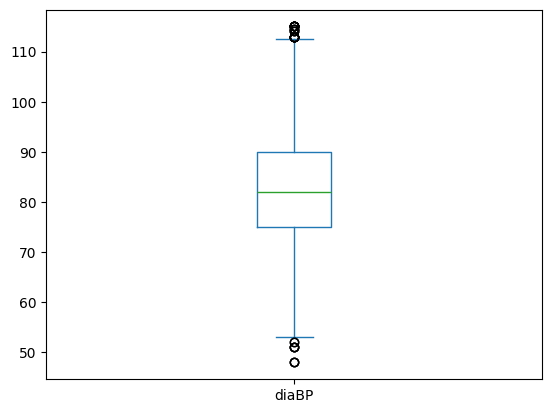

In [61]:
df["diaBP"].plot.box()

In [62]:
df["BMI"].quantile(0.97)

34.563900000000004

In [63]:
df=df[df["BMI"]<=df["BMI"].quantile(0.97)]       #removing the outliers of BMI column

<Axes: >

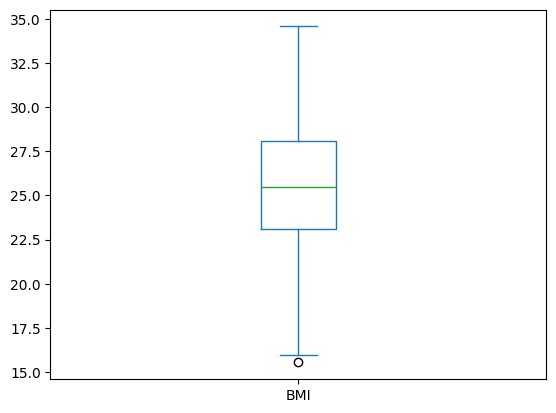

In [64]:
df["BMI"].plot.box()

In [65]:
df["heartRate"].quantile(0.975)

100.0

In [66]:
df=df[df["heartRate"]<=df["heartRate"].quantile(0.975)]         #removing the outliers in heartrate column

<Axes: >

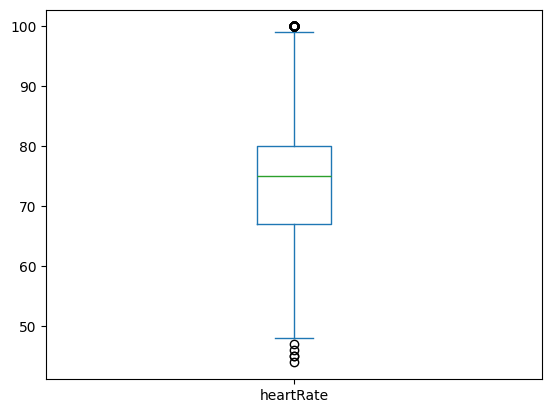

In [67]:
df["heartRate"].plot.box()

In [68]:
df["glucose"].quantile(0.92)

103.0

In [69]:
df=df[df["glucose"]<=df["glucose"].quantile(0.92)]        #removing outliers of glucose column

<Axes: >

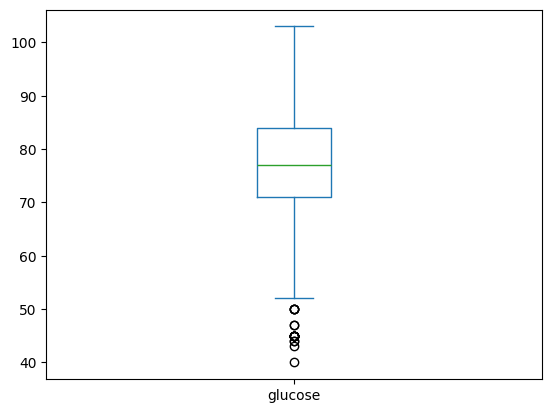

In [70]:
df["glucose"].plot.box()

In [71]:
df.info()               

<class 'pandas.core.frame.DataFrame'>
Index: 5004 entries, 0 to 898
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              5004 non-null   int32  
 1   age              5004 non-null   int64  
 2   education        5004 non-null   int64  
 3   cigsPerDay       5004 non-null   int64  
 4   BPMeds           5004 non-null   int64  
 5   prevalentStroke  5004 non-null   int64  
 6   prevalentHyp     5004 non-null   int64  
 7   diabetes         5004 non-null   int32  
 8   totChol          5004 non-null   int64  
 9   sysBP            5004 non-null   float64
 10  diaBP            5004 non-null   float64
 11  BMI              5004 non-null   float64
 12  heartRate        5004 non-null   int64  
 13  glucose          5004 non-null   int64  
 14  CHDRisk          5004 non-null   int32  
dtypes: float64(3), int32(3), int64(9)
memory usage: 566.9 KB


##### after cleaning the data, the 6168 data has been reduced to 5025.

In [72]:
df.reset_index()         #since the numbers has been reduced, we have to reset the index

,index,sex,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,0,1,39,4,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,1,0,46,2,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,2,1,48,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,4,0,46,3,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0
4,5,0,43,2,0,0,0,1,0,228,180.0,110.0,30.30,77,99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999,2895,0,50,1,0,0,0,1,0,234,143.0,90.0,29.36,70,86,1
5000,415,1,44,2,20,0,0,1,0,319,158.0,90.0,29.15,89,100,1
5001,2479,1,49,2,17,0,0,0,0,211,128.0,89.0,31.07,75,76,1
5002,1202,1,51,4,10,0,0,0,0,185,125.0,85.0,29.43,56,72,1


## DATA MODELING & EVALUATION

In [73]:
X=df.drop(columns="CHDRisk")             # Splitting X and y

In [74]:
y=df["CHDRisk"]

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC                                    #importing the necessary models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, roc_curve,auc, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [76]:
scaler=StandardScaler()                     #transforming the data into standard scaler data

In [77]:
X=scaler.fit_transform(X)

In [78]:
X

array([[ 0.97708111, -1.35070865,  1.98152797, ...,  0.4126346 ,
         0.5194694 , -0.067037  ],
       [-1.02345648, -0.54346377,  0.05073915, ...,  0.92176758,
         1.93373755, -0.16279867],
       [ 0.97708111, -0.31282237, -0.91465525, ..., -0.05889197,
         0.04804668, -0.7373687 ],
       ...,
       [ 0.97708111, -0.19750167,  0.05073915, ...,  1.59868302,
         0.04804668, -0.16279867],
       [ 0.97708111,  0.03313972,  1.98152797, ...,  1.12426365,
        -1.74335965, -0.54584535],
       [ 0.97708111, -0.65878446,  1.98152797, ...,  0.32006496,
         0.14233122, -0.7373687 ]])

In [79]:
X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.2,random_state=23)        #performing train test split

#### Creating a function to find the model score, accuracy, roc auc score, roc auc curve, classification report, confusion matrix, precision, recall, f1 score

In [80]:
def evaluate_model(model,X_tr,X_te,y_tr,y_te):
    model.fit(X_tr,y_tr)
    score=model.score(X_tr,y_tr)
    print("score",score)
    
    y_pr_tr=model.predict(X_tr)
    y_pr_te=model.predict(X_te)
    accuracy=accuracy_score(y_te,y_pr_te)
    print("accuracy",accuracy)
    
    pred_prob_train = model.predict_proba(X_tr)[:,1]
    pred_prob_test = model.predict_proba(X_te)[:,1]
    
    roc_score_train=roc_auc_score(y_tr,y_pr_tr)
    roc_score_test=roc_auc_score(y_te,y_pr_te)
    print("roc_train_score",roc_score_train)
    print("roc_test_score",roc_score_test)
    
    fpr,tpr,threshold=roc_curve(y_te,pred_prob_test)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color="red", label="ROC Curve (Area=%0.2f)"%roc_auc)
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC-AUC Curve")
    plt.legend()
    plt.show()
    
    print("classification_report",classification_report(y_te, y_pr_te))
    print("confusion_matrix",confusion_matrix(y_te,y_pr_te))
    print("precision",precision_score(y_te,y_pr_te))
    print("recall",recall_score(y_te,y_pr_te))
    print("f1 score",f1_score(y_te,y_pr_te))

   

#### MODEL 1: LOGISTIC REGRESSION

In [81]:
lr_model=LogisticRegression()

score 0.6919810142393205
accuracy 0.6833166833166833
roc_train_score 0.6886238022650271
roc_test_score 0.6781404090210976


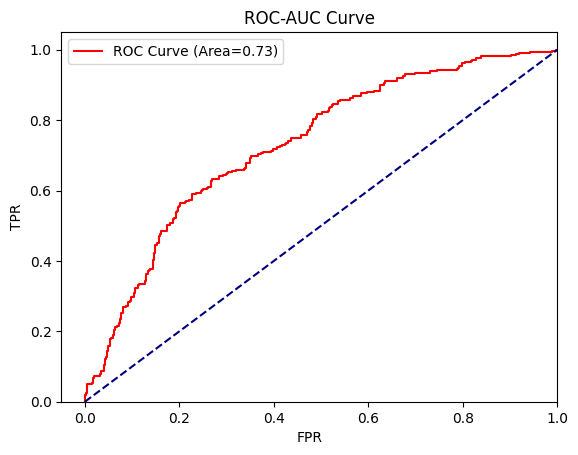

classification_report               precision    recall  f1-score   support

           0       0.71      0.72      0.72       556
           1       0.65      0.63      0.64       445

    accuracy                           0.68      1001
   macro avg       0.68      0.68      0.68      1001
weighted avg       0.68      0.68      0.68      1001

confusion_matrix [[403 153]
 [164 281]]
precision 0.6474654377880185
recall 0.6314606741573033
f1 score 0.6393629124004551


In [82]:
lr_score=evaluate_model(lr_model,X_tr,X_te,y_tr,y_te)

#### MODEL 2: DECISION TREE CLASSIFIER

In [83]:
dt_model=DecisionTreeClassifier()

score 1.0
accuracy 0.9140859140859141
roc_train_score 1.0
roc_test_score 0.9217646107832835


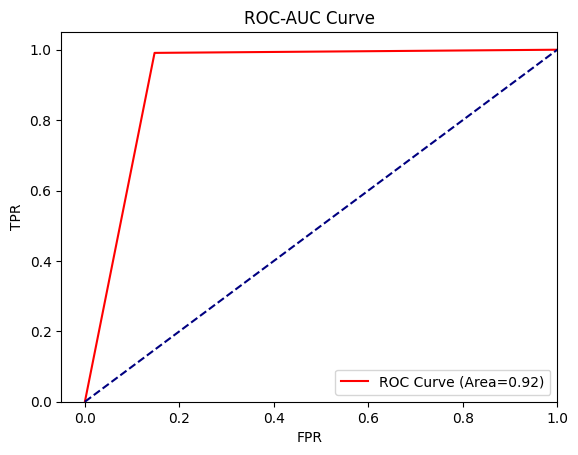

classification_report               precision    recall  f1-score   support

           0       0.99      0.85      0.92       556
           1       0.84      0.99      0.91       445

    accuracy                           0.91      1001
   macro avg       0.92      0.92      0.91      1001
weighted avg       0.93      0.91      0.91      1001

confusion_matrix [[474  82]
 [  4 441]]
precision 0.8432122370936902
recall 0.9910112359550561
f1 score 0.9111570247933884


In [84]:
dt_score=evaluate_model(dt_model,X_tr,X_te,y_tr,y_te)

#### MODEL 3: RANDOM FOREST CLASSIFIER

In [85]:
rf_model=RandomForestClassifier()

score 1.0
accuracy 0.975024975024975
roc_train_score 1.0
roc_test_score 0.9766207258911972


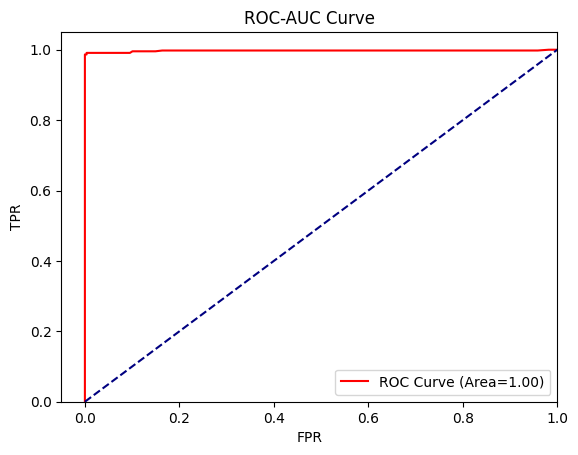

classification_report               precision    recall  f1-score   support

           0       0.99      0.96      0.98       556
           1       0.95      0.99      0.97       445

    accuracy                           0.98      1001
   macro avg       0.97      0.98      0.97      1001
weighted avg       0.98      0.98      0.98      1001

confusion_matrix [[535  21]
 [  4 441]]
precision 0.9545454545454546
recall 0.9910112359550561
f1 score 0.9724366041896362


In [86]:
rf_score=evaluate_model(rf_model,X_tr,X_te,y_tr,y_te)

In [87]:
score = cross_val_score(rf_model, X, y, cv=10)

In [97]:
score

array([0.99201597, 0.98802395, 0.98602794, 0.99001996, 0.986     ,
       0.978     , 0.994     , 0.986     , 0.982     , 0.988     ])

#### MODEL 4: SUPPORT VECTOR MACHINE(LINEAR)

In [88]:
svm_model=SVC(kernel="linear", probability=True)

score 0.6877341993504872
accuracy 0.6713286713286714
roc_train_score 0.6852029396347598
roc_test_score 0.6675733570447013


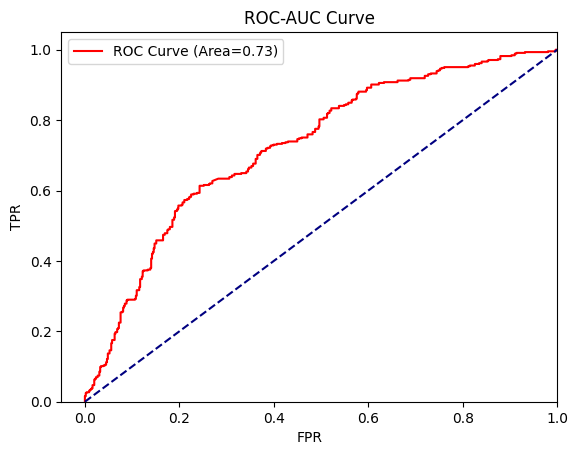

classification_report               precision    recall  f1-score   support

           0       0.71      0.70      0.70       556
           1       0.63      0.63      0.63       445

    accuracy                           0.67      1001
   macro avg       0.67      0.67      0.67      1001
weighted avg       0.67      0.67      0.67      1001

confusion_matrix [[390 166]
 [163 282]]
precision 0.6294642857142857
recall 0.6337078651685393
f1 score 0.631578947368421


In [89]:
svm_score=evaluate_model(svm_model,X_tr,X_te,y_tr,y_te)

#### MODEL 5: NAIVE BAYES(GAUSSIAN)

In [90]:
nb_model=GaussianNB()

score 0.6327754184361729
accuracy 0.6333666333666333
roc_train_score 0.6156121778843546
roc_test_score 0.6069315334249453


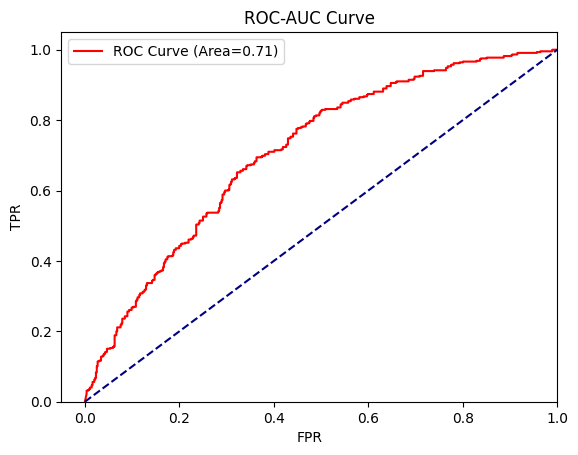

classification_report               precision    recall  f1-score   support

           0       0.63      0.85      0.72       556
           1       0.66      0.37      0.47       445

    accuracy                           0.63      1001
   macro avg       0.64      0.61      0.60      1001
weighted avg       0.64      0.63      0.61      1001

confusion_matrix [[470  86]
 [281 164]]
precision 0.656
recall 0.3685393258426966
f1 score 0.4719424460431655


In [91]:
nb_score=evaluate_model(nb_model,X_tr,X_te,y_tr,y_te)

#### MODEL 6: K-NEAREST NEIGHBOR(KNN)

In [92]:
knn_model=KNeighborsClassifier()

score 0.8643517361978517
accuracy 0.7972027972027972
roc_train_score 0.8708534922346807
roc_test_score 0.8060059817314686


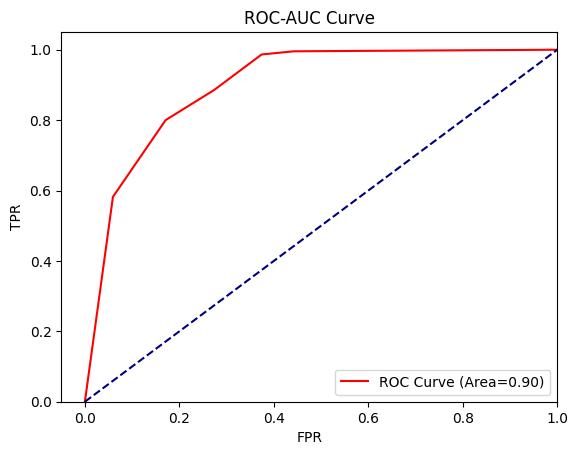

classification_report               precision    recall  f1-score   support

           0       0.89      0.73      0.80       556
           1       0.72      0.89      0.80       445

    accuracy                           0.80      1001
   macro avg       0.80      0.81      0.80      1001
weighted avg       0.81      0.80      0.80      1001

confusion_matrix [[404 152]
 [ 51 394]]
precision 0.7216117216117216
recall 0.8853932584269663
f1 score 0.7951564076690212


In [93]:
knn_score=evaluate_model(knn_model,X_tr,X_te,y_tr,y_te)

In [94]:
adb_model=AdaBoostClassifier()

score 0.7059705221084187
accuracy 0.6943056943056943
roc_train_score 0.7023528174261275
roc_test_score 0.6889297550723468


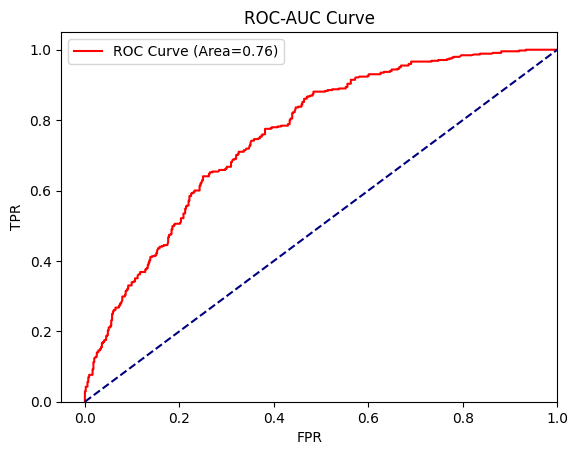

classification_report               precision    recall  f1-score   support

           0       0.72      0.74      0.73       556
           1       0.66      0.64      0.65       445

    accuracy                           0.69      1001
   macro avg       0.69      0.69      0.69      1001
weighted avg       0.69      0.69      0.69      1001

confusion_matrix [[410 146]
 [160 285]]
precision 0.6612529002320185
recall 0.6404494382022472
f1 score 0.6506849315068494


In [95]:
adb_score=evaluate_model(adb_model,X_tr,X_te,y_tr,y_te)

### SUMMARY

#### The majority and minority of the count in our dataset come from the negative and positive, respectively. Accuracy scores aren't very helpful when dealing with imbalanced data or classes. 

#### It is acceptable to classify a healthy individual as having a 10-year risk of coronary heart disease CHD (false positive) and to conduct additional medical tests; however, it is categorically unacceptable to fail to identify a particular patient or to classify a particular patient as healthy (false negative). As a result, the model's recall score will be the primary focus of our project.

#### We can select the Final model as **Random forest** due to its highest recall score.

#### It is acceptable to classify a healthy individual as having a 10-year risk of coronary heart disease CHD (false positive) and to follow up with additional medical tests; however, it is categorically unacceptable to miss identifying a particular patient or to classify a particular patient as healthy (false negative).